In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
# import "Dataset prediction USDCNY.xlsx"
files.upload()

Saving Dataset prediction USDCNY.xlsx to Dataset prediction USDCNY (2).xlsx


{'Dataset prediction USDCNY (2).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00t6Z\xa6z\x01\x00\x00\x84\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [5]:
# read the data
df = pd.read_excel('Dataset prediction USDCNY.xlsx')

In [6]:
# show the dataset
df.head()

,Date,USD/CNY - US Dollar Chinese Yuan,DY (endogenous in first difference),Direction,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,2015-01-01,6.2495,NaN,NaN,1994.99,3210.36,-3.5,0.11,5.3
1,2015-02-01,6.2695,0.003200,Up,2104.50,3310.30,-3.5,0.11,5.3
2,2015-03-01,6.1990,-0.011245,Down,2067.89,3747.90,-3.5,0.11,5.3
3,2015-04-01,6.2018,0.000452,Up,2085.51,4441.66,-4.6,0.12,5.3
4,2015-05-01,6.1980,-0.000613,Down,2107.39,4611.74,-4.6,0.12,5.3


In [7]:
# permanently drop 'Date' as it is not a feature
df.drop('Date', axis=1, inplace=True)

In [8]:
# show the dataset
df.head()

,USD/CNY - US Dollar Chinese Yuan,DY (endogenous in first difference),Direction,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,6.2495,NaN,NaN,1994.99,3210.36,-3.5,0.11,5.3
1,6.2695,0.003200,Up,2104.50,3310.30,-3.5,0.11,5.3
2,6.1990,-0.011245,Down,2067.89,3747.90,-3.5,0.11,5.3
3,6.2018,0.000452,Up,2085.51,4441.66,-4.6,0.12,5.3
4,6.1980,-0.000613,Down,2107.39,4611.74,-4.6,0.12,5.3


In [70]:
# "isnull" identifies missing values
# the first "sum()" calculates the total number of missing values per column
# the second "sum()" calculates the total number of missing values per row
df.isnull().sum().sum()

np.int64(1)

In [69]:
# since there can be multiple modes,
# [0] selects the first mode in the list,
# [1] selects the second mode, and so forth.
df['Direction'].fillna(value=df['Direction'].mode()[0])

,Direction
0,Down
1,Up
2,Down
3,Up
4,Down
...,...
115,Down
116,Up
117,Up
118,Up


In [73]:
mode_value = df['Direction'].mode()[0] if not df['Direction'].mode().empty else 'Up'

In [75]:
df['Direction'] = df['Direction'].fillna(value=mode_value)

In [67]:
# "fill" is used for imputation
# "na" is used to indicate missing values
# "DY (endogenous in first difference)" is the name of the variable (i.e., the column label)
# "median" can be used instead of "mean"
df['DY (endogenous in first difference)'].fillna(value=df['DY (endogenous in first difference)'].mean())

,DY (endogenous in first difference)
0,0.001406
1,0.003200
2,-0.011245
3,0.000452
4,-0.000613
...,...
115,-0.017910
116,-0.010212
117,0.014278
118,0.017491


In [77]:
df.isnull().sum()

,0
USD/CNY - US Dollar Chinese Yuan,0
DY (endogenous in first difference),0
Direction,0
S&P 500 Index,0
SSE Composite Index,0
GDP Growth Differential (US - China in %),0
USA Interest Rate,0
China Interest Rate,0


In [15]:
# for quick descriptive statistics
df['GDP Growth Differential (US - China in %)'].describe()

,GDP Growth Differential (US - China in %)
count,120.000000
mean,-3.117500
std,7.395861
min,-31.300000
25%,-4.625000
50%,-3.550000
75%,-1.700000
max,30.300000


In [16]:
df['SSE Composite Index'].describe()

,SSE Composite Index
count,120.00000
mean,3183.78075
std,325.51497
min,2493.90000
25%,2976.13000
50%,3164.03500
75%,3349.64500
max,4611.74000


In [17]:
df['USD/CNY - US Dollar Chinese Yuan'].describe()

,USD/CNY - US Dollar Chinese Yuan
count,120.000000
mean,6.756899
std,0.318731
min,6.198000
25%,6.473000
50%,6.763750
75%,7.020900
max,7.315800


In [18]:
df['S&P 500 Index'].describe()

,S&P 500 Index
count,120.000000
mean,3365.555250
std,1094.236322
min,1920.030000
25%,2458.577500
50%,3008.970000
75%,4184.327500
max,6032.380000


In [19]:
df['DY (endogenous in first difference)'].describe()

,DY (endogenous in first difference)
count,119.000000
mean,0.001406
std,0.014264
min,-0.034152
25%,-0.008174
50%,0.000666
75%,0.009699
max,0.042386


In [20]:
df['USA Interest Rate'].describe()

,USA Interest Rate
count,120.000000
mean,1.782583
std,1.873314
min,0.050000
25%,0.127500
50%,1.155000
75%,2.402500
max,5.330000


In [21]:
df['China Interest Rate'].describe()

,China Interest Rate
count,120.000000
mean,4.039250
std,0.455224
min,3.100000
25%,3.700000
50%,4.150000
75%,4.300000
max,5.300000


In [22]:
df['Direction'].describe()

,Direction
count,119
unique,2
top,Down
freq,61


In [81]:
# STEP 4 DATA TRANSFORMATION
# data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   USD/CNY - US Dollar Chinese Yuan           120 non-null    float64
 1   DY (endogenous in first difference)        120 non-null    float64
 2   Direction                                  120 non-null    object 
 3   S&P 500 Index                              120 non-null    float64
 4   SSE Composite Index                        120 non-null    float64
 5   GDP Growth Differential (US - China in %)  120 non-null    float64
 6   USA Interest Rate                          120 non-null    float64
 7   China Interest Rate                        120 non-null    float64
dtypes: float64(7), object(1)
memory usage: 7.6+ KB


In [87]:
if df['Direction'].dtype == 'object':
    df['Direction'] = df['Direction'].astype('category').cat.codes

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   USD/CNY - US Dollar Chinese Yuan           120 non-null    float64
 1   DY (endogenous in first difference)        120 non-null    float64
 2   Direction                                  120 non-null    int8   
 3   S&P 500 Index                              120 non-null    float64
 4   SSE Composite Index                        120 non-null    float64
 5   GDP Growth Differential (US - China in %)  120 non-null    float64
 6   USA Interest Rate                          120 non-null    float64
 7   China Interest Rate                        120 non-null    float64
dtypes: float64(7), int8(1)
memory usage: 6.8 KB


In [90]:
# class distribution
df['Direction'].value_counts()

,count
Direction,
0,62
1,58


In [91]:
#STEP 5. DATA SPLITTING
# import necessary libraries
from sklearn.model_selection import train_test_split

In [113]:
# target and features identification
x = df.drop('Direction', axis=1)
y = df['Direction']

In [121]:
x = df.drop(columns=['Direction', 'USD/CNY - US Dollar Chinese Yuan', 'DY (endogenous in first difference)'])

In [122]:
# updated class labels and their frequencies
y.value_counts()

,count
Direction,
0,62
1,58


In [129]:
print(X.head())

   S&P 500 Index  SSE Composite Index  \
0        1994.99              3210.36   
1        2104.50              3310.30   
2        2067.89              3747.90   
3        2085.51              4441.66   
4        2107.39              4611.74   

   GDP Growth Differential (US - China in %)  USA Interest Rate  \
0                                       -3.5               0.11   
1                                       -3.5               0.11   
2                                       -3.5               0.11   
3                                       -4.6               0.12   
4                                       -4.6               0.12   

   China Interest Rate  
0                  5.3  
1                  5.3  
2                  5.3  
3                  5.3  
4                  5.3  


In [130]:
# split the data into a training set and a test set
# the "random_state" parameter ensures that the training and test sets remain consistent across different runs
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=2)

In [131]:
# STEP 6. STANDARDIZATION
# import necessary libraries
from sklearn.preprocessing import StandardScaler

# set up the scaler, the tool used for standardizing the features
scaler = StandardScaler()

# compute the mean and standard deviation of each feature
# using only the training set for scaling
scaler.fit(x_train)

StandardScaler()

In [132]:
#1. STANDARDIZING X_TRAIN
# transform "x_train" by applying standardization
stand_x_train = scaler.transform(x_train)

# create a new dataset with the standardized training features ("x_train")
# use "columns=x_train.columns" to retain the original column names from "x_train"
df_stand_x_train = pd.DataFrame(stand_x_train,columns=x_train.columns)

# show the updated training set with features only
df_stand_x_train.head()

,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,0.530271,-0.096992,0.350841,0.988437,-0.777171
1,-1.130591,-0.257168,-0.275394,-0.698059,0.753068
2,-0.353541,-0.656666,-3.619492,-0.937500,-0.306328
3,0.620220,0.081719,-0.212771,1.654706,-0.777171
4,-0.710910,-2.000191,-0.187722,0.270114,0.776610


In [134]:
#2. STANDARDIZING X_TEST
# apply standardization to "x_test" using the previously defined scaler
stand_x_test = scaler.transform(x_test)

# create a new dataset with the standardized test features ("x_test")
# use "columns=x_test.columns" to retain the original column names from "x_test"
df_stand_x_test = pd.DataFrame(stand_x_test,columns=x_test.columns)

# show the updated test set with features only
df_stand_x_test.head()

,S&P 500 Index,SSE Composite Index,GDP Growth Differential (US - China in %),USA Interest Rate,China Interest Rate
0,-0.698039,-1.117548,-0.300444,-0.031789,0.776610
1,0.970174,-0.505557,0.037723,1.795248,-1.248014
2,0.433557,0.878734,-1.365044,-0.942705,-0.306328
3,-1.094474,-0.070699,-0.325493,-0.640801,0.753068
4,-0.510338,-0.987191,0.150446,0.129573,0.635358


In [135]:
#STEP 7. "K" NUMBER
# import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# set up an empty list to record error rates across different K values
error_rate = []

# try various K values within the range of 1 to 40
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i) # model building
    knn.fit(df_stand_x_train,y_train) # model training
    y_pred = knn.predict(df_stand_x_test) # prediction generation
    error_rate.append(np.mean(y_pred != y_test)) # error rate generation

Text(0, 0.5, 'Error Rate')

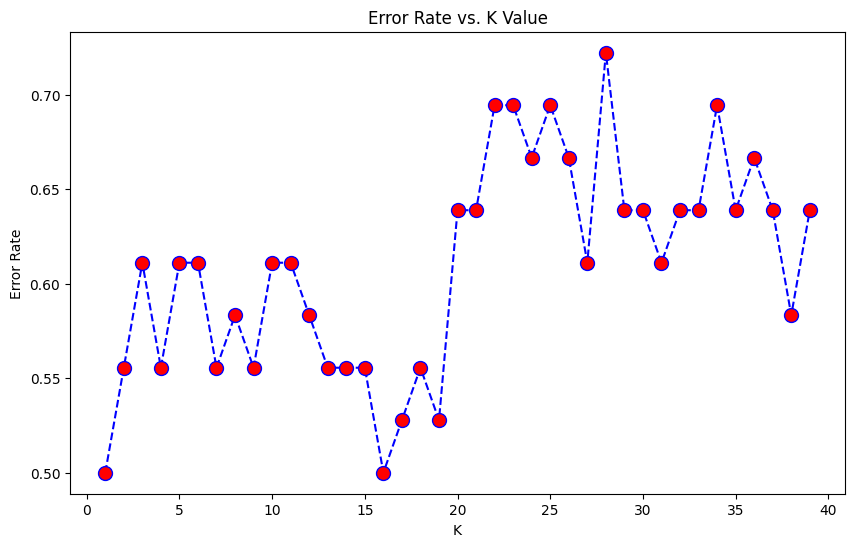

In [136]:
# chart design
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

# chart title
plt.title('Error Rate vs. K Value')

# axis label
plt.xlabel('K')
plt.ylabel('Error Rate')

In [137]:
#STEP 8. K-NN ALGORITHM
# model building
knn = KNeighborsClassifier(n_neighbors=9)

# model training
knn.fit(df_stand_x_train,y_train)

# prediction generation
y_pred = knn.predict(df_stand_x_test)

In [138]:
# STEP 9. PERFORMANCE MEASURE
# import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [139]:
# model performance with K=1

knn = KNeighborsClassifier(n_neighbors=1) # model building
knn.fit(df_stand_x_train,y_train) # model training
y_pred = knn.predict(df_stand_x_test) # prediction generation

print('WITH K=1') # to print "WITH K=1"
print('\n') # add spacing between output lines

print(confusion_matrix(y_test,y_pred)) # to print the confusion matrix
print('\n') # add spacing between output lines

print(classification_report(y_test,y_pred)) # to print the other performance metrics

WITH K=1


[[11  6]
 [12  7]]


              precision    recall  f1-score   support

           0       0.48      0.65      0.55        17
           1       0.54      0.37      0.44        19

    accuracy                           0.50        36
   macro avg       0.51      0.51      0.49        36
weighted avg       0.51      0.50      0.49        36



In [149]:
# model performance with the optimal "k" number (K=16)

knn = KNeighborsClassifier(n_neighbors=16) # model building
knn.fit(df_stand_x_train,y_train) # model training
y_pred = knn.predict(df_stand_x_test) # prediction generation

print('WITH K=16') # to print "WITH K=17"
print('\n') # add spacing between output lines

print(confusion_matrix(y_test,y_pred)) # to print the confusion matrix
print('\n') # add spacing between output lines

print(classification_report(y_test,y_pred)) # to print the other performance metrics

WITH K=16


[[ 9  8]
 [10  9]]


              precision    recall  f1-score   support

           0       0.47      0.53      0.50        17
           1       0.53      0.47      0.50        19

    accuracy                           0.50        36
   macro avg       0.50      0.50      0.50        36
weighted avg       0.50      0.50      0.50        36

